In [1]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from functools import reduce
import numpy.ma as ma
import scipy.interpolate
import numpy as np
import xarray as xr
import sys,time,os
import random, warnings
import seaborn as sns
from matplotlib import cm, colors

In [2]:
sys.path.append(os.path.abspath("/work/bb1018/b380873/tropic_vis/traj/"))
sys.path.append(os.path.abspath("/work/bb1018/b380873/tropic_vis/utilities/"))
from flighttrack import *
from plotting_utilities import *
from densityPlot import *
from thermodynamic_functions import *
from icetraj import *
from xhistogram.xarray import histogram as xhist
farbe = sim_colors()

# Comparison of CLaMS and ICON trajectories

### (1a) One-dimensional histograms of qi and Ni along the trajectories
In this first version, I load npy files that contain all the filtered values.

In [38]:
# Five files with all the trajectory data
basedir = '/work/bb1018/b380873/tropic_vis/output/'
suffix = '_outflow.npy'  # '_insitu.npy', '_outflow.npy'
qi_twomomfi = [ 'qi-RHi-T_traj_CLAMS-Tf_0V2M0A0R' + suffix, 'qi-RHi-T_traj_ICON_0V2M0A0R' + suffix, 
                'qi-RHi-T_traj_CLAMS_0V2M0A0R' + suffix ]
qi_onemomfi = [ 'qi-RHi-T_traj_CLAMS-Tf_0V1M0A0R' + suffix, 'qi-RHi-T_traj_ICON_0V1M0A0R' + suffix ]
Ni_twomomfi = [ 'Ni-RHi-T_traj_CLAMS-Tf_0V2M0A0R' + suffix, 'Ni-RHi-T_traj_ICON_0V2M0A0R' + suffix,
               'Ni-RHi-T_traj_CLAMS_0V2M0A0R' + suffix ]
Ni_onemomfi = [ 'Ni-RHi-T_traj_CLAMS-Tf_0V1M0A0R' + suffix ]

stil = [ '-', '--', 'dotted' ]
lbl = [ 'CLAMS-Tf-1M', 'ICON-1M', 'CLAMS-Tf-2M', 'ICON-2M', 'CLAMS-2M' ]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2.5363133144872325
575.468430319005
17.421217416964765
701.971879617168
3.9869523
1813.7661
12.91222210847294
696.3674320649113


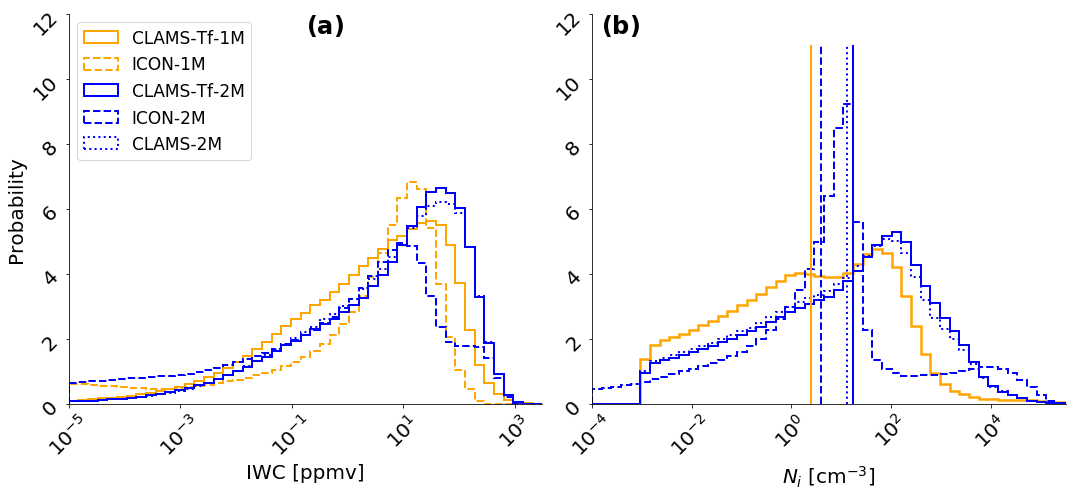

CPU times: user 57.5 s, sys: 15.8 s, total: 1min 13s
Wall time: 1min 14s


In [39]:
%%time
m = 50
iwc_min = -5
iwc_max = 3.5
Ni_min = -4
Ni_max = 5.5
fs = 20
lw = 2.5

fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(15,7) )
bins = np.logspace( iwc_min, iwc_max, m )
for f, s, l in zip(qi_onemomfi, stil, lbl):
    fi = np.load( basedir + f )
    qi = fi[2]
    wgts = np.ones_like(qi) / float(len(qi))*100
    h = ax[0].hist( qi, bins=bins, weights=wgts, color='orange', histtype='step', linewidth=2, linestyle=s, label=l )
    #ax[0].plot( [np.nanmean(qi), np.nanmean(qi)], [0, 8], linestyle=s, linewidth=2, color='orange' )
    #print(np.nanmean(qi))
    #print(len(qi))
    
for f, s, l in zip(qi_twomomfi, stil, lbl[2:]):
    fi = np.load( basedir + f )
    qi = fi[2]
    wgts = np.ones_like(qi) / float(len(qi))*100
    h = ax[0].hist( qi, bins=bins, weights=wgts, color='blue',histtype='step', linewidth=2, linestyle=s, label=l )
    #ax[0].plot( [np.nanmean(qi), np.nanmean(qi)], [0, 8], linestyle=s, linewidth=2, color='blue' )
    #print(np.nanmean(qi))
    #print(len(qi))
    
ax[0].set_xlim([10**(iwc_min), 10**(iwc_max)])
ax[0].set_ylim([0,12])
ax[0].set_xscale('log')
ax[0].text(0.5, 0.95, r'$\bf{(a)}$', fontsize=fs+4, transform=ax[0].transAxes)
ax[0].set_xlabel( 'IWC [ppmv]', fontsize=fs )
ax[0].set_ylabel( 'Probability', fontsize=fs )
l = ax[0].legend( loc='upper left', fontsize=fs-3 )
sexy_axes( ax[0], fs )
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

bins = np.logspace( Ni_min, Ni_max, m )
for f, s, l in zip(Ni_onemomfi, stil, lbl):
    fi = np.load( basedir + f )
    Ni = fi[2]
    wgts = np.ones_like(Ni) / float(len(Ni))*100
    h = ax[1].hist( Ni, bins=bins, weights=wgts, color='orange', histtype='step', linewidth=2.5, linestyle=s, label=l )
    ax[1].plot( [np.nanmedian(Ni), np.nanmedian(Ni)], [0, 11], linestyle=s, linewidth=2, color='orange' )
    print(np.nanmedian(Ni))
    print(np.nanmean(Ni))
    
for f, s, l in zip(Ni_twomomfi, stil, lbl[2:]):
    fi = np.load( basedir + f )
    Ni = fi[2]
    wgts = np.ones_like(Ni) / float(len(Ni))*100
    h = ax[1].hist( Ni, bins=bins, weights=wgts, color='blue',histtype='step', linewidth=2, linestyle=s, label=l )
    ax[1].plot( [np.nanmedian(Ni), np.nanmedian(Ni)], [0, 11], linestyle=s, linewidth=2, color='blue' )
    print(np.nanmedian(Ni))
    print(np.nanmean(Ni))

ax[1].set_xlim([10**(-4), 10**(Ni_max)])    
ax[1].set_ylim([0,12])
ax[1].set_xscale('log')
ax[1].text(0.02, 0.95, r'$\bf{(b)}$', fontsize=fs+4, transform=ax[1].transAxes)
ax[1].set_xlabel( r'$N_i$ [cm$^{-3}$]', fontsize=fs )
#ax[1].legend( loc='center left', fontsize=fs )
sexy_axes( ax[1], fs )

plt.tight_layout()
#fig.savefig('output/qi-Ni-pdfs-median.pdf',bbox_inches='tight')
plt.show()

### (1b) One-dimensional histograms of qi and Ni along the trajectories
In this second version, I load nc files that contain only the histogram values.

In [3]:
basedir = '/work/bb1018/b380873/traj_output/traj_pp/'
names = [ 'qih-Nih-CLAMS-Tf_0V1M0A0R.nc', 'qih-Nih-ICON_0V1M0A0R.nc', 
          'qih-Nih-CLAMS-Tf_0V2M0A0R.nc', 'qih-Nih-ICON_0V2M0A0R.nc',
          'qih-Nih-CLAMS_0V2M0A0R.nc', 'qih-Nih-CLAMS-Tf_0V2M0A0R_noSHflux.nc']
#names = [ 'qih-Nih-CLAMS-Tf_0V1M0A0R_filter.nc', 'qih-Nih-ICON_0V1M0A0R_filter.nc', 
#          'qih-Nih-CLAMS-Tf_0V2M0A0R_filter.nc', 'qih-Nih-ICON_0V2M0A0R_filter.nc',
#          'qih-Nih-CLAMS_0V2M0A0R.nc', 'qih-Nih-CLAMS-Tf_0V2M0A0R_noSHflux.nc']
datasets = []
for n in names:
    d = xr.open_dataset( basedir + n )
    datasets.append( d )

In [4]:
# Logarithmic IWC bins in ppmv, as well as their centerpoints
qi_bins = np.logspace( -5, 3.5, 50 )
qi_bins_c = ( qi_bins[1:] + qi_bins[:-1] )/2.

# Logarithmic Ni bins in cm-3, as well as their centerpoints
Ni_bins = np.logspace( -4, 5.5, 50 )
Ni_bins_c = ( Ni_bins[1:] + Ni_bins[:-1] )/2.

# Linear T bins in K
T_bins = np.linspace( 190, 240, 50 )
T_bins_c = ( T_bins[1:] + T_bins[:-1] )/2.

# Linear RHi bins in %
RHi_bins = np.linspace( 60, 120, 50 )
RHi_bins_c = ( RHi_bins[1:] + RHi_bins[:-1] )/2.

In [5]:
# Load the StratoClim values to plot their IWC and ICNC distribution also
sc = xr.open_dataset( '/work/bb1018/b380873/tropic_vis/obs/stratoclim2017.geophysika.0808_1.filtered_per_sec.nc')
sc_qi = sc['BEST:IWC']
sc_Ni = sc['BEST:N_ice']
sc_RHi = sc['BEST:RH_ice_gas']

# Apply the same filters and weights as for the simulated values
sc_qi = sc_qi.where( (sc_RHi > 0) & (sc_qi > 10**(-8)) )
wgts = 1*xr.apply_ufunc( np.isfinite, sc_qi )
wgts = wgts / wgts.sum( dim=['time'] ) * 100.
sc_qim = np.nanmean( sc_qi )
sc_qih, _ = np.histogram( sc_qi, bins=qi_bins, weights=wgts )

# Factor of 10**3 below to convert cm-3 to L-1
sc_Ni = sc_Ni.where( (sc_RHi > 0) & (sc_Ni > 10**(-8)) )*10**3
wgts = 1*xr.apply_ufunc( np.isfinite, sc_Ni )
wgts = wgts / wgts.sum( dim=['time'] ) * 100.
sc_Nim = np.nanmean( sc_Ni )
sc_Nih, _ = np.histogram( sc_Ni, bins=Ni_bins, weights=wgts )

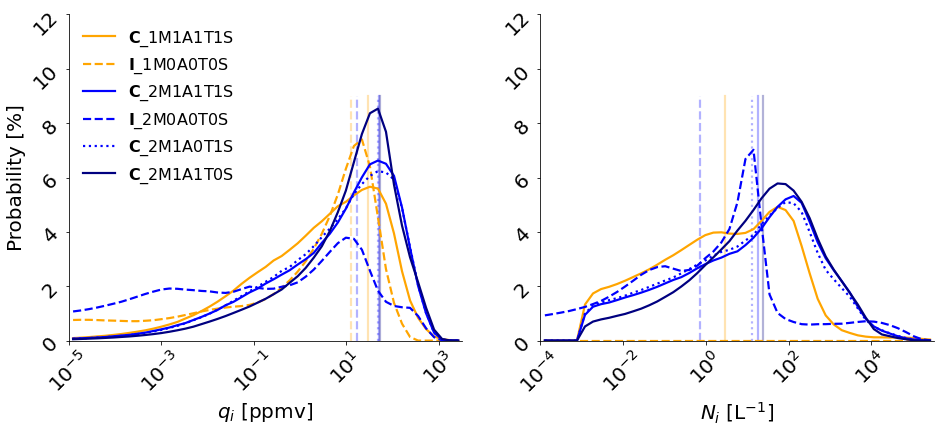

In [10]:
# Plot the histograms of qi and Ni for extracted trajectories
lw = 2.2
fs = 20
a1 = 1
a2 = 0.3
suffix = '' # '_insitu', '_outflow', '_flight'
couleurs = [ 'orange', 'orange', 'blue', 'blue', 'blue', 'navy' ]
stil = [ '-', '--', '-', '--', ':', '-' ]
lbls = [ r'$\bf{C}$' + '_1M1T1S', r'$\bf{I}$' + '_1M0T0S', r'$\bf{C}$' + '_2M1T1S',
         r'$\bf{I}$' + '_2M0T0S', r'$\bf{C}$' + '_2M0T1S', r'$\bf{C}$' + '_2M1T0S' ]

fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(15.5,6) )
# icon-only = [1:5:2]
for c, s, d, l, j in zip(couleurs, stil, datasets, lbls, np.arange(6)):
    ax[0].plot( qi_bins_c, d['qih' + suffix], color=c, linestyle=s, linewidth=lw, label=l, alpha=a1 )
    qim, _ = centroids( 'qi' + suffix, j )
    ax[0].plot( [qim, qim], [0, 9], color=c, linestyle=s, linewidth=lw, alpha=a2, zorder=0 )
    
    # The ICON one-moment simulation has no ice crystal number output.
    #if l != 'ICON-1M': 
    ax[1].plot( Ni_bins_c, d['Nih' + suffix], color=c, linestyle=s, linewidth=lw, alpha=a1 )
    _, Nim = centroids( 'Ni' + suffix, j )
    ax[1].plot( [Nim, Nim], [0, 9], color=c, linestyle=s, linewidth=lw, alpha=a2, zorder=0 )
    
## Plot the StratoClim values if visualizing flight track period
#ax[0].plot( qi_bins_c, sc_qih, color='red', linestyle='-', linewidth=lw, label='Flight 7', alpha=a1 )
#ax[0].plot( [sc_qim, sc_qim], [0, 9], color='red', linestyle='-', linewidth=lw, alpha=a2, zorder=0 )
#ax[1].plot( Ni_bins_c, sc_Nih, color='red', linestyle='-', linewidth=lw, label='Flight 7', alpha=a1 )
#ax[1].plot( [sc_Nim, sc_Nim], [0, 9], color='red', linestyle='-', linewidth=lw, alpha=a2, zorder=0 )
##

ax[0].set_xlim([qi_bins[0], qi_bins[-1]])
ax[0].set_ylim([0,12])
ax[0].set_xscale('log')
#ax[0].text(0.6, 0.92, r'$\bf{(a)}$', fontsize=fs+4, transform=ax[0].transAxes)
ax[0].set_xlabel( r'$q_i$ [ppmv]', fontsize=fs )
ax[0].set_ylabel( 'Probability [%]', fontsize=fs )
l = ax[0].legend( loc='upper left', fontsize=fs-4, frameon=False )
sexy_axes( ax[0], fs )

ax[1].set_xlim([Ni_bins[0], Ni_bins[-1]])    
ax[1].set_ylim([0,12])
ax[1].set_xscale('log')
#ax[1].text(0.02, 0.92, r'$\bf{(b)}$', fontsize=fs+4, transform=ax[1].transAxes)
ax[1].set_xlabel( r'$N_i$ [L$^{-1}$]', fontsize=fs )
sexy_axes( ax[1], fs )

#fig.savefig( 'output/CLaMS-ICON-qi-Ni-pdfs' + suffix + '_icon-clams.pdf',bbox_inches='tight' )
plt.show()

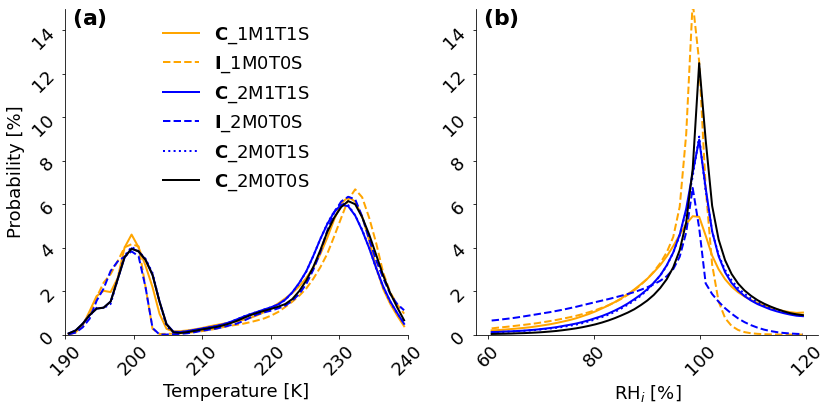

In [8]:
# Plot the histograms of qi and Ni for extracted trajectories
lw = 2
fs = 18
a = 0.5
suffix = '' # '_outflow', '_insitu', '_flight'
couleurs = [ 'orange', 'orange', 'blue', 'blue', 'blue', 'k' ]
stil = [ '-', '--', '-', '--', ':', '-' ]
lbls = [ r'$\bf{C}$' + '_1M1T1S', r'$\bf{I}$' + '_1M0T0S', r'$\bf{C}$' + '_2M1T1S',
         r'$\bf{I}$' + '_2M0T0S', r'$\bf{C}$' + '_2M0T1S', r'$\bf{C}$' + '_2M0T0S' ]

fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(13.5,6) )
for c, s, d, l, j in zip(couleurs, stil, datasets, lbls, np.arange(6)):
    ax[0].plot( T_bins_c, d['Th'], color=c, linestyle=s, linewidth=lw, label=l )
    #Tm, _ = centroids( 'T' + suffix, j )
    #ax[0].plot( [Tm, Tm], [0, 9], color=c, linestyle=s, linewidth=lw, alpha=a )
    ax[1].plot( RHi_bins_c, d['RHih'], color=c, linestyle=s, linewidth=lw, label=l )
    #RHim, _ = centroids( 'RHi' + suffix, j )
    #ax[1].plot( [RHim, RHim], [0, 9], color=c, linestyle=s, linewidth=lw, alpha=a )
    
ax[0].set_xlim([T_bins[0], T_bins[-1]])
ax[0].set_ylim([0,15])
ax[0].set_xlabel( 'Temperature [K]', fontsize=fs )
ax[0].set_ylabel( 'Probability [%]', fontsize=fs )
ax[0].text(0.02, 0.95, r'$\bf{(a)}$', fontsize=fs+4, transform=ax[0].transAxes)
l = ax[0].legend( loc='upper center', fontsize=fs, frameon=False )
sexy_axes( ax[0], fs )
 
ax[1].set_ylim([0,15])
ax[1].text(0.02, 0.95, r'$\bf{(b)}$', fontsize=fs+4, transform=ax[1].transAxes)
ax[1].set_xlabel( r'RH$_i$ [%]', fontsize=fs )
sexy_axes( ax[1], fs )

#fig.savefig( 'output/CLaMS-ICON-T-RHi-pdfs' + suffix + '.pdf',bbox_inches='tight' )
plt.show()

### (1c) Ice microphysical process histograms

In [11]:
basedir = '/work/bb1018/b380873/traj_output/traj_pp/'
names = [ 'het-hom-pre-CLAMS-Tf_0V1M0A0R_filter.nc', #'qsed-ICON_0V1M0A0R.nc', 
          'het-hom-pre-CLAMS-Tf_0V2M0A0R_filter.nc', #'qsed-ICON_0V2M0A0R.nc',
          'het-hom-pre-CLAMS_0V2M0A0R.nc']
datasets = []
for n in names:
    d = xr.open_dataset( basedir + n )
    datasets.append( d )

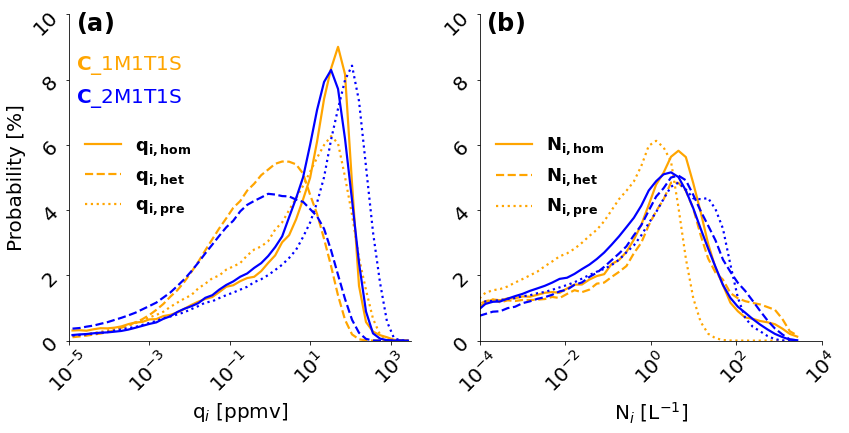

In [12]:
# Plot the histograms of CLaMS processes
lw = 2.2
fs = 20
a = 1 # 0.5
suffix = '' # '_outflow', '_insitu', '_flight'
couleurs = [ 'orange', 'blue' ]
lbls = [ [r'$\bf{q_{i,hom}}$', r'$\bf{q_{i,het}}$', r'$\bf{q_{i,pre}}$', r'$\bf{N_{i,hom}}$', r'$\bf{N_{i,het}}$', r'$\bf{N_{i,pre}}$' ],
          ['', '', '', '', '', '', '' ] ]
#, r'$\bf{C}$' + '_2M0A1T1S' ]

fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(13.5,6) )
for c, s, d, l, j in zip(couleurs, stil, datasets[:2], lbls, np.arange(2)):
    ax[0].plot( qi_bins_c, d['qhomih'], color=c, linestyle='-', linewidth=lw, label=l[0], alpha=a )
    ax[0].plot( qi_bins_c, d['qhetih'], color=c, linestyle='--', linewidth=lw, label=l[1], alpha=a )
    ax[0].plot( qi_bins_c, d['qpreih'], color=c, linestyle=':', linewidth=lw, label=l[2], alpha=a )
    
    ax[1].plot( qi_bins_c, d['Nhomih'], color=c, linestyle='-', linewidth=lw, label=l[3], alpha=a )
    ax[1].plot( qi_bins_c, d['Nhetih'], color=c, linestyle='--', linewidth=lw, label=l[4], alpha=a )
    ax[1].plot( qi_bins_c, d['Npreih'], color=c, linestyle=':', linewidth=lw, label=l[5], alpha=a )
    
ax[0].text( 0.02, 0.83, r'$\bf{C}$' + '_1M1T1S', color='orange', fontsize=fs, transform=ax[0].transAxes )
ax[0].text( 0.02, 0.73, r'$\bf{C}$' + '_2M1T1S', color='blue', fontsize=fs, transform=ax[0].transAxes )
ax[0].set_ylabel( 'Probability [%]', fontsize=fs )
l = ax[0].legend( loc='center left', fontsize=fs-2, frameon=False )
ax[0].set_xscale('log')
ax[0].set_xlim([qi_bins[0], qi_bins[-1]])    
ax[0].set_ylim([0,10])
ax[0].text(0.02, 0.95, r'$\bf{(a)}$', fontsize=fs+4, transform=ax[0].transAxes)
ax[0].set_xlabel( r'q$_i$ [ppmv]', fontsize=fs )
sexy_axes( ax[0], fs )

ax[1].set_xscale('log')
ax[1].set_xlim([Ni_bins[0], 10**4])    
ax[1].set_ylim([0,10])
l = ax[1].legend( loc='center left', fontsize=fs-2, frameon=False )
ax[1].text(0.02, 0.95, r'$\bf{(b)}$', fontsize=fs+4, transform=ax[1].transAxes)
ax[1].set_xlabel( r'N$_i$ [L$^{-1}$]', fontsize=fs )
sexy_axes( ax[1], fs )

#fig.savefig( 'output/CLaMS-qi-Ni-process-pdfs' + suffix + '.pdf',bbox_inches='tight' )
plt.show()

### (2a) Two-dimensional histograms of qi versus temperature

In [3]:
basedir = '/work/bb1018/b380873/traj_output/traj_pp/'
basedir2 = '/work/bb1018/b380873/tropic_vis/obs/'

names = [ 'qiNi-TRHi-2Dh-CLAMS-Tf_0V1M0A0R_filter.nc', 'qiNi-TRHi-2Dh-ICON_0V1M0A0R_filter.nc',
          'qiNi-TRHi-2Dh-CLAMS-Tf_0V2M0A0R_filter.nc', 'qiNi-TRHi-2Dh-ICON_0V2M0A0R_filter.nc',
          'qiNi-TRHi-2Dh-CLAMS_0V2M0A0R.nc', 'stratoclim2017.geophysika.0808_1_hist.nc' ]
bd = [ basedir ] * 5 + [ basedir2 ]

datasets = []
for n, b in zip(names, bd):
    d = xr.open_dataset( b + n )
    datasets.append( d )

0
1
2
3
4


<ipython-input-7-3d9205b8b351>:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


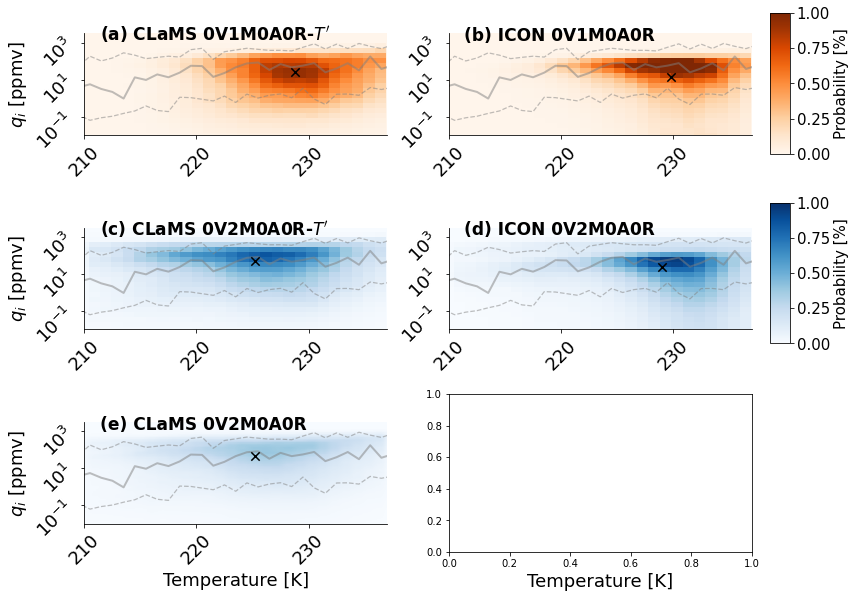

In [7]:
# Method without external function
# Plot the density of ice mass mixing ratio values against temperatures for all times
fs = 15
fig, ax = plt.subplots( nrows=3, ncols=2, figsize=(10.75,8.5) )
xmin = 210
xmax = 237
ymin = -3
ymax = 3.5
alf = 0.5

lbl = [ r"(a) CLaMS 0V1M0A0R-$T'$", '(b) ICON 0V1M0A0R', r"(c) CLaMS 0V2M0A0R-$T'$", '(d) ICON 0V2M0A0R',
        '(e) CLaMS 0V2M0A0R', '(f) StratoClim Flight 7' ]
#T_MK, IWC_min_MK, IWC_max_MK, IWC_med_MK = martina_T_IWC_line()
T_MK, IWC_10_MK, _, IWC_50_MK, _, IWC_90_MK = martina_T_qi_perc_tropics()
farbe = [ cm.Oranges, cm.Oranges, cm.Blues, cm.Blues, cm.Blues, cm.Reds ]

for d, a, l, f, j in zip( datasets, ax.reshape(-1), lbl, farbe, np.arange(5) ):
    print(j)
    if j < 5:
        ym, _, xm, _ = centroids( 'qiTh_outflow', j )
        # First and third outputs are means. Second and fourth are medians.
        a.scatter( xm, np.log10(ym), marker='x', color='k', s=70, zorder=10 )
        h = a.imshow( d['qiTh_outflow'], origin='lower', cmap=f, extent=[190, 240, -3, 3.5],
                 vmin=0, vmax=1, aspect=1.65 )
        if j == 1:
            cbar_ax = fig.add_axes([1, 0.74, 0.025, 0.23])
            cb = fig.colorbar(h, cax=cbar_ax)
            cb.ax.tick_params(labelsize=fs)
            cb.ax.set_ylabel('Probability [%]', fontsize=fs)
        if j == 3:
            cbar_ax = fig.add_axes([1, 0.43, 0.025, 0.23])
            cb = fig.colorbar(h, cax=cbar_ax)
            cb.ax.tick_params(labelsize=fs)
            cb.ax.set_ylabel('Probability [%]', fontsize=fs)
    else:
        h = a.imshow( d['qiTh_outflow'], origin='lower', cmap=f, extent=[190, 240, -3, 3.5],
                 norm=colors.LogNorm(vmin=10**(-2.5),vmax=1), aspect=1.65 )
        cbar_ax = fig.add_axes([1, 0.12, 0.025, 0.23])
        cb = fig.colorbar(h, cax=cbar_ax)
        cb.ax.tick_params(labelsize=fs)
        cb.ax.set_ylabel('Probability [%]', fontsize=fs+3)
        
    #a.plot( T_MK, np.log10(IWC_min_MK), linewidth=1.25, linestyle='--', color='gray' )
    #a.plot( T_MK, np.log10(IWC_med_MK), linewidth=2, linestyle='-', color='gray' )
    #a.plot( T_MK, np.log10(IWC_max_MK), linewidth=1.25, linestyle='--', color='gray' )
    
    a.plot( T_MK, np.log10(IWC_10_MK), linewidth=1.25, linestyle='--', color='gray', alpha=alf )
    a.plot( T_MK, np.log10(IWC_50_MK), linewidth=2, linestyle='-', color='gray', alpha=alf )
    a.plot( T_MK, np.log10(IWC_90_MK), linewidth=1.25, linestyle='--', color='gray', alpha=alf )
    a.axis( [xmin, xmax, ymin+1, ymax] )
    
    a.set_yticks([ymin+2, ymin+4, ymin+6])
    a.set_yticklabels([r'10$^{-1}$', r'10$^{:1d}$'.format(ymin+4), r'10$^{:1d}$'.format(ymin+6)])
    a.text(0.05, 0.93, l, weight='bold', fontsize=fs+2, transform=a.transAxes)
    sexy_axes(a, fs+3)
    
ax[0,0].set_ylabel(r"$q_i$ [ppmv]", fontsize=fs+3)
ax[1,0].set_ylabel(r"$q_i$ [ppmv]", fontsize=fs+3)
ax[2,1].set_xlabel("Temperature [K]", fontsize=fs+3)
ax[2,0].set_ylabel(r"$q_i$ [ppmv]", fontsize=fs+3)
ax[2,0].set_xlabel("Temperature [K]", fontsize=fs+3)

plt.tight_layout()

#fig.savefig('output/CLaMS-ICON-qi-T-density-norm_flight.pdf', bbox_inches='tight')
plt.show()

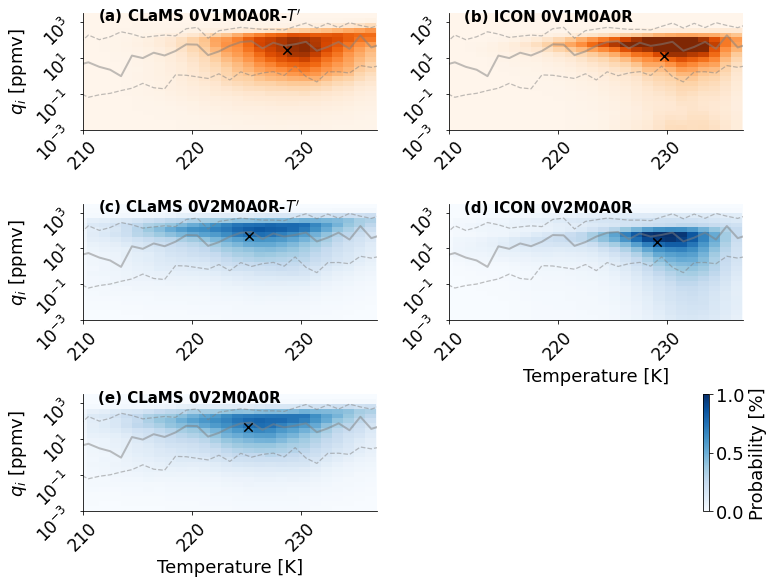

In [5]:
densityPlot( datasets, 'qiT', 'T', 210, 237, 'qi', tiwc_line=True, centroid=True )

## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

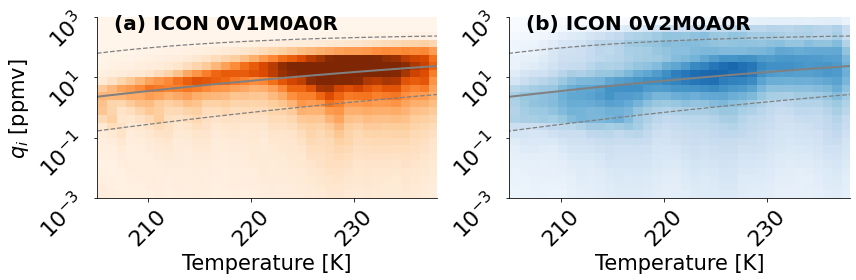

In [7]:
# Plot the density of ice mass mixing ratio values against temperatures for the full ICON trajectories
fs = 18
fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(12,4) )
n = 50
m = 25
ymin = -3
ymax = 3

directories = [ 'traj_ICON_0V1M0A0R', 'traj_ICON_0V2M0A0R' ]
timepoints = [ 1350, 450 ]
lbl = [ '(a) ICON 0V1M0A0R', '(b) ICON 0V2M0A0R' ]
farbe = [ cm.Oranges, cm.Blues ]
T_MK, IWC_min_MK, IWC_max_MK, IWC_med_MK = martina_T_IWC_line()

for d, tp, a, l, f in zip( directories, timepoints, ax.reshape(-1), lbl, farbe ):
    # To recalculate the values being loaded, uncomment the line below
    #xx, _, i = read_iwctraj_all( d, tp )
    #g = np.stack( (xx, rhrh, i) )
    #np.save('output/qi-RHi-T_all_' + d, g)
    xx = np.load('output/qi-RHi-T_all_' + d + '.npy')
    yy = np.log10( xx[2] )
    xx = xx[0]
    wgts = np.ones_like(xx) / float(len(xx))
    h = a.hist2d( x=xx, y=yy, cmap=f, bins=[np.linspace(195,240,n), np.linspace(ymin,ymax,m)], weights=wgts,
                norm=colors.Normalize(vmin=0,vmax=10**(-2.5)) )
    a.plot( T_MK, np.log10(IWC_min_MK), linewidth=1.25, linestyle='--', color='gray' )
    a.plot( T_MK, np.log10(IWC_med_MK), linewidth=2, linestyle='-', color='gray' )
    a.plot( T_MK, np.log10(IWC_max_MK), linewidth=1.25, linestyle='--', color='gray' )
    a.axis( [xx.min(), xx.max(), ymin, ymax] )
    a.set_yticks([ymin, ymin+2, ymin+4, ymin+6])
    a.set_yticklabels([r'10$^{-3}$', r'10$^{-1}$', r'10$^1$', r'10$^{3}$'])
    a.text(0.05, 0.93, l, weight='bold', fontsize=fs+2, transform=a.transAxes)
    sexy_axes(a, fs+4)
    
ax[0].set_ylabel(r"$q_i$ [ppmv]", fontsize=fs+3)
ax[0].set_xlabel("Temperature [K]", fontsize=fs+3)
ax[1].set_xlabel("Temperature [K]", fontsize=fs+3)

#cb = fig.colorbar(h[3], ax=ax[1])
#cb.ax.tick_params(labelsize=fs+3)
#cb.ax.set_ylabel('Occurrence density', fontsize=fs+3)
plt.tight_layout()

#fig.savefig('output/ICON-qi-T-density-norm_all.pdf', bbox_inches='tight')
plt.show()

## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### (1b) Density plots of qi versus RHi

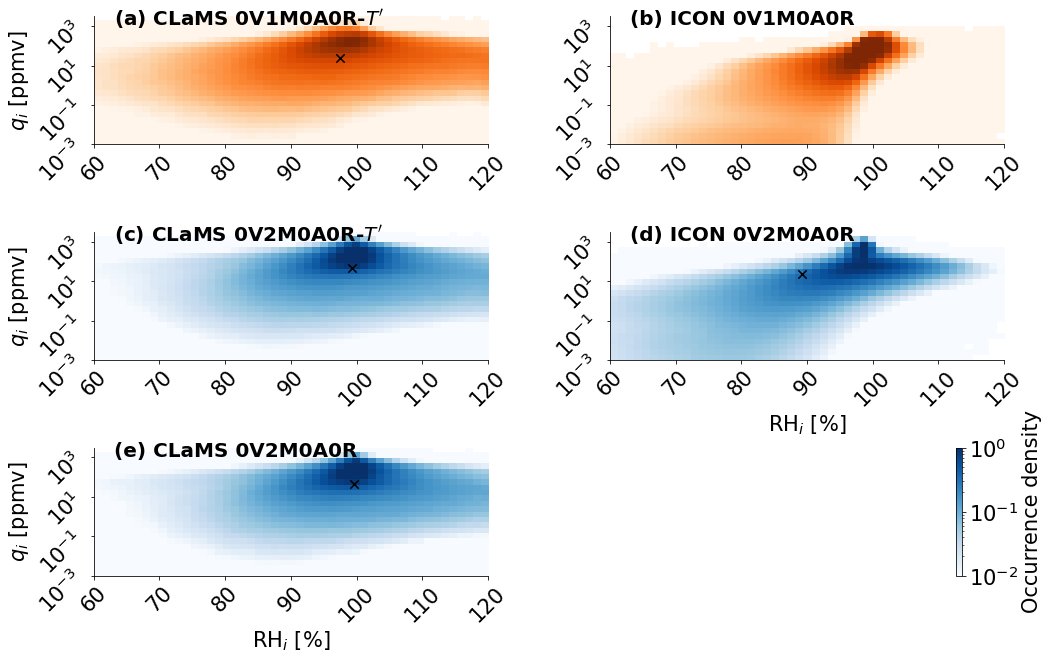

In [22]:
# Plot the density of ice mass mixing ratio values against RHi for all times
fs = 18
fig, ax = plt.subplots( nrows=3, ncols=2, figsize=(15,9) )
n = 50
m = 25
ymin = -3
ymax = 3.5
xmin = 60
xmax = 120


lbl = [ r"(a) CLaMS 0V1M0A0R-$T'$", '(b) ICON 0V1M0A0R', r"(c) CLaMS 0V2M0A0R-$T'$", '(d) ICON 0V2M0A0R', '(e) CLaMS 0V2M0A0R' ]
farbe = [ cm.Oranges, cm.Oranges, cm.Blues, cm.Blues, cm.Blues ]
for d, a, l, f, j in zip( datasets, ax.reshape(-1), lbl, farbe, np.arange(5) ):
    h = a.imshow( d['qiRHih_outflow'], origin='lower', cmap=f, extent=[60, 120, -3, 3.5], aspect=3,
                 norm=colors.LogNorm(vmin=10**(-2),vmax=1) ) 
    ym, _, xm, _ = centroids( 'qiRHih_outflow', j )
    # First and third outputs are means. Second and fourth are medians.
    a.scatter( xm, np.log10(ym), marker='x', color='k', s=70, zorder=10 )
    a.axis( [xmin, xmax, ymin, ymax] )
    
    a.set_yticks([ymin, ymin+2, ymin+4, ymin+6])
    a.set_yticklabels([r'10$^{-3}$', r'10$^{-1}$', r'10$^{:1d}$'.format(ymin+4),
                       r'10$^{:1d}$'.format(ymin+6)])
    a.text(0.05, 0.93, l, weight='bold', fontsize=fs+2, transform=a.transAxes)
    sexy_axes(a, fs+3)
    
ax[0,0].set_ylabel(r"$q_i$ [ppmv]", fontsize=fs+3)
ax[1,0].set_ylabel(r"$q_i$ [ppmv]", fontsize=fs+3)
ax[1,1].set_xlabel(r"RH$_i$ [%]", fontsize=fs+3)
ax[2,0].set_ylabel(r"$q_i$ [ppmv]", fontsize=fs+3)
ax[2,0].set_xlabel(r"RH$_i$ [%]", fontsize=fs+3)

cb = fig.colorbar(h, ax=ax[2,1])
cb.ax.tick_params(labelsize=fs+3)
cb.ax.set_ylabel('Occurrence density', fontsize=fs+3)

ax[2,1].set_visible('')
plt.tight_layout()

#fig.savefig('output/CLaMS-ICON-qi-RHi-density-norm.pdf', bbox_inches='tight')
plt.show()

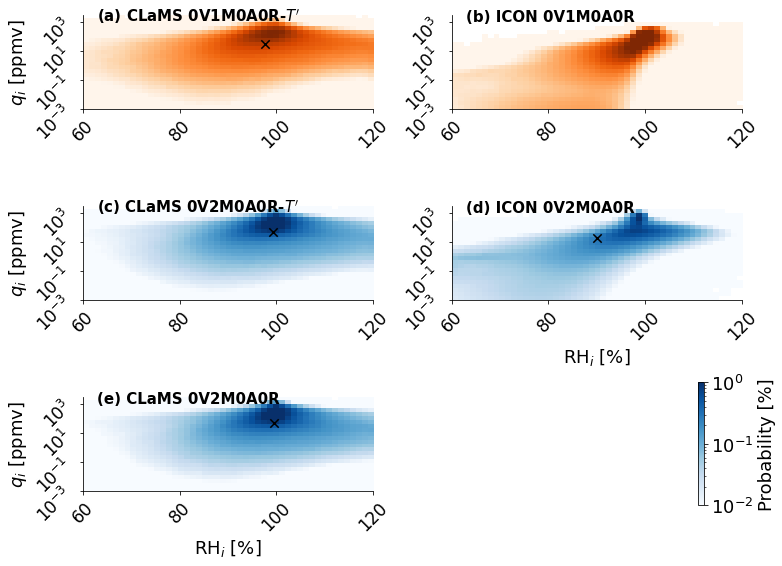

In [9]:
densityPlot( datasets, 'qiRHih', 'RHi', 60, 120, 'qi', tiwc_line=False, centroid=True )

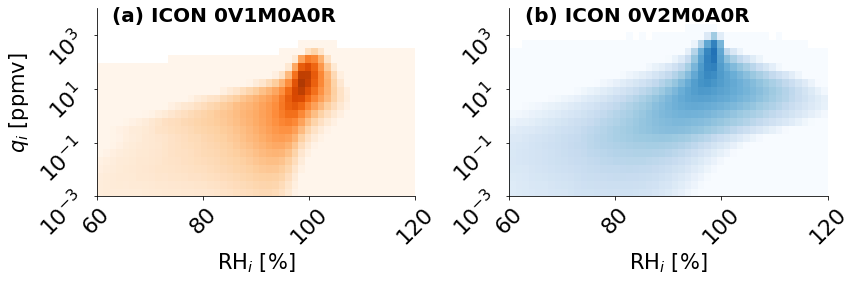

In [5]:
# Plot the density of ice mass mixing ratio values against temperatures for the full ICON trajectories
fs = 18
fig, ax = plt.subplots( nrows=1, ncols=2, figsize=(12,4) )
n = 50
m = 25
ymin = -3
ymax = 4
xmin = 60
xmax = 120

directories = [ 'traj_ICON_0V1M0A0R', 'traj_ICON_0V2M0A0R' ]
timepoints = [ 1350, 450 ]
lbl = [ '(a) ICON 0V1M0A0R', '(b) ICON 0V2M0A0R' ]
farbe = [ cm.Oranges, cm.Blues ]
for d, tp, a, l, f in zip( directories, timepoints, ax.reshape(-1), lbl, farbe ):
    ## To recalculate the values being loaded, uncomment the lines below
    #xx, rhrh, i = read_iwctraj_all( d, tp )
    #g = np.stack( (xx, rhrh, i) )
    ##np.save('output/qi-RHi-T_all_' + d, g)
    
    xx = np.load('output/qi-RHi-T_all_' + d + '.npy')
    yy = np.log10( xx[2] )
    xx = xx[1]
    wgts = np.ones_like(xx) / float(len(xx))
    h = a.hist2d( x=xx, y=yy, cmap=f, bins=[np.linspace(xmin,xmax,n), np.linspace(ymin,ymax,m)], weights=wgts,
            norm=colors.LogNorm(vmin=10**(-4),vmax=10**(-1)) )
    a.axis( [xmin, xmax, ymin, ymax] )
    a.set_yticks([ymin, ymin+2, ymin+4, ymin+6])
    a.set_yticklabels([r'10$^{-3}$', r'10$^{-1}$', r'10$^1$', r'10$^{3}$'])
    a.text(0.05, 0.93, l, weight='bold', fontsize=fs+2, transform=a.transAxes)
    sexy_axes(a, fs+4)
    
ax[0].set_ylabel(r"$q_i$ [ppmv]", fontsize=fs+3)
ax[0].set_xlabel(r"RH$_i$ [%]", fontsize=fs+3)
ax[1].set_xlabel(r"RH$_i$ [%]", fontsize=fs+3)

#cb = fig.colorbar(h[3], ax=ax[1])
#cb.ax.tick_params(labelsize=fs+3)
#cb.ax.set_ylabel('Occurrence density', fontsize=fs+3)
plt.tight_layout()

#fig.savefig('output/ICON-qi-RHi-density-norm_all.pdf', bbox_inches='tight')
plt.show()

## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### (1c) Density plots of Ni versus T

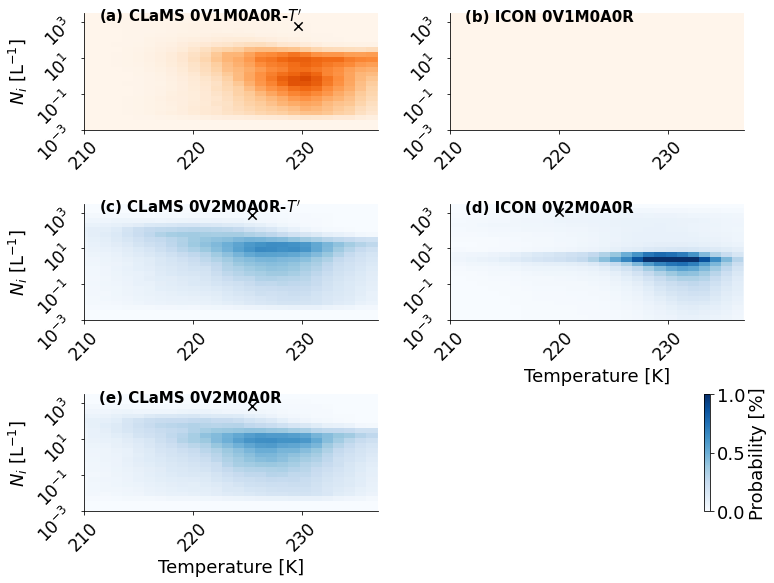

In [23]:
densityPlot( datasets, 'NiTh', 'T', 210, 237, 'Ni', tiwc_line=False, centroid=True )

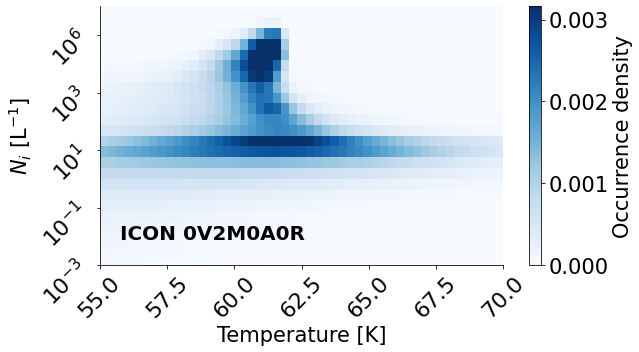

In [51]:
# Plot the density of ice crystal number concentration values against temperature for the full ICON trajectories
fs = 18
fig = plt.figure( figsize=(9,5) )
n = 50
m = 25
ymin = -3
ymax = 6
xmin = 55  # 0 
xmax = 70  # 120

directories = [ 'traj_ICON_0V2M0A0R' ]
timepoints = [ 450 ]
lbl = [ 'ICON 0V2M0A0R' ]
farbe = [ cm.Blues ]
for d, tp, l, f in zip( directories, timepoints, lbl, farbe ):
    # To recalculate the values being loaded, uncomment the line below
    #xx, rhrh, i = read_icnctraj_all( d, tp )
    xx = np.load('output/Ni-RHi-T_all_' + d + '.npy')
    yy = np.log10( xx[2] )
    xx = xx[1]
    wgts = np.ones_like(xx) / float(len(xx))
    h = plt.hist2d( x=xx, y=yy, cmap=f, bins=[np.linspace(xmin,xmax,n), np.linspace(ymin,ymax,m)], weights=wgts,
          norm=colors.Normalize(vmin=0,vmax=10**(-2.5)) )    
    plt.gca().axis( [xmin, xmax, ymin, ymax] )
    plt.gca().set_yticks([ymin, ymin+2, ymin+4, ymin+6, ymin+8])
    plt.gca().set_yticklabels([r'10$^{-3}$', r'10$^{-1}$', r'10$^1$', r'10$^{3}$', r'10$^{6}$'])
    plt.gca().text(0.05, 0.1, l, weight='bold', fontsize=fs+2, transform=plt.gca().transAxes)
    sexy_axes(plt.gca(), fs+4)
    
cb = fig.colorbar(h[3], ax=plt.gca())
cb.ax.tick_params(labelsize=fs+3)
cb.ax.set_ylabel('Occurrence density', fontsize=fs+3)

plt.gca().set_ylabel(r"$N_i$ [L$^{-1}$]", fontsize=fs+3)
plt.gca().set_xlabel("Temperature [K]", fontsize=fs+3)
plt.tight_layout()

#fig.savefig('output/ICON-Ni-RHi-density-norm_all.pdf', bbox_inches='tight')
plt.show()

## 4. How do box plots of Ni at different temperatures compare between CLaMS, ICON, and Martina Kraemer's in-situ data?

In [8]:
# Regenerate the statistics for the five sets of trajectories
basedir = '/work/bb1018/b380873/tropic_vis/output/'
#sims = [ 'CLAMS-Tf_0V1M0A0R', 'ICON_0V1M0A0R', 'CLAMS-Tf_0V2M0A0R', 'CLAMS_0V2M0A0R', 'ICON_0V2M0A0R' ]
sims = [ 'CLAMS-Tf_0V1M0A0R', 'CLAMS-Tf_0V2M0A0R', 'CLAMS_0V2M0A0R', 'ICON_0V2M0A0R' ]
t_bins = np.arange(180, 245)
# The threshold parameter ensures we calculate statistics only when a non-negligible sample is present.
threshold = 100

# Initialize traj_stats to nans (not 0's so that these are not misinterpreted)
traj_stats = np.empty((5, len(t_bins), len(sims)))
traj_stats[:] = None
for s, j in zip(sims, np.arange(5)):
    print(s)
    # Identify which trajectory values go into which 1-K bins between 180 and 244 K (Same bins as MK's data)
    #vals = np.load( basedir + 'qi-RHi-T_traj_' + s + '.npy' )
    vals = np.load( basedir + 'Ni-RHi-T_traj_' + s + '.npy')
    indx = np.digitize( vals[0], bins=t_bins )
    
    # Sort the trajectory output (ice mass mixing ratio = vals[2]) into these bins
    traj_list = [ [] for k in np.arange(len(t_bins)) ]
    for elem_idx, group_idx in enumerate(indx):
        traj_list[group_idx-1].append( vals[2, elem_idx].item() )
    
    # Calculate the statistics across these bins
    for k in np.arange(len(t_bins)):
        if (len(traj_list[k]) > threshold):
            traj_stats[0, k, j] = np.percentile( traj_list[k], 10 )
            traj_stats[1, k, j] = np.percentile( traj_list[k], 25 )
            traj_stats[2, k, j] = np.percentile( traj_list[k], 50 )
            traj_stats[3, k, j] = np.percentile( traj_list[k], 75 )
            traj_stats[4, k, j] = np.percentile( traj_list[k], 90 )
            # This does not work. It's recast as a nan and I don't know how to circumvent.
            #traj_stats[5, k, j] = None  # As below, no fliers will be plotted

#np.save( basedir + 'qi_traj_stats.npy', traj_stats )  
np.save( basedir + 'Ni_traj_stats.npy', traj_stats )

CLAMS-Tf_0V1M0A0R
CLAMS-Tf_0V2M0A0R
CLAMS_0V2M0A0R
ICON_0V2M0A0R


In [11]:
basedir = '/work/bb1018/b380873/tropic_vis/output/'
# IWC statistics are in [ppmv]
qi_traj_stats = np.log10( np.load( basedir + 'qi_traj_stats.npy' ) )
Ni_traj_stats = np.log10( np.load( basedir + 'Ni_traj_stats.npy' ) )
print(qi_traj_stats.shape)  # 5 statistics, 65 temperatures, 5 simulations

(5, 65, 5)


In [4]:
Tp, Ni_p10, Ni_p25, Ni_p50, Ni_p75, Ni_p90 = martina_T_Ni_perc()
Ni_percentiles = np.stack((Ni_p10, Ni_p25, Ni_p50, Ni_p75, Ni_p90))  # 5 percentiles in [ppmv] over 65 temperatures
Ni_percentiles = np.where(Ni_percentiles!=0,Ni_percentiles,np.nan) # Set the zero values in Ni_percentiles to nan to be able to take the log10
#Ni_percentiles = np.vstack((Ni_percentiles,[None]*len(Tp))) # no fliers (None)

Tp, Ri_p10, Ri_p25, Ri_p50, Ri_p75, Ri_p90 = martina_T_ri_perc()
Ri_percentiles = np.stack((Ri_p10, Ri_p25, Ri_p50, Ri_p75, Ri_p90))  # 5 percentiles in [ppmv] over 65 temperatures
Ri_percentiles = np.where(Ri_percentiles!=0, Ri_percentiles, np.nan) # Set the zero values in Ni_percentiles to nan to be able to take the log10
#Ri_percentiles = np.vstack((Ri_percentiles,[None]*len(Tp))) # no fliers (None)

IWC_percentiles = calc_IWC( Ni_percentiles, Ri_percentiles )
IWC_percentiles = np.where(IWC_percentiles!=0, np.log10(IWC_percentiles), np.nan)
IWC_percentiles = np.vstack( (IWC_percentiles,[None]*len(Tp)) )

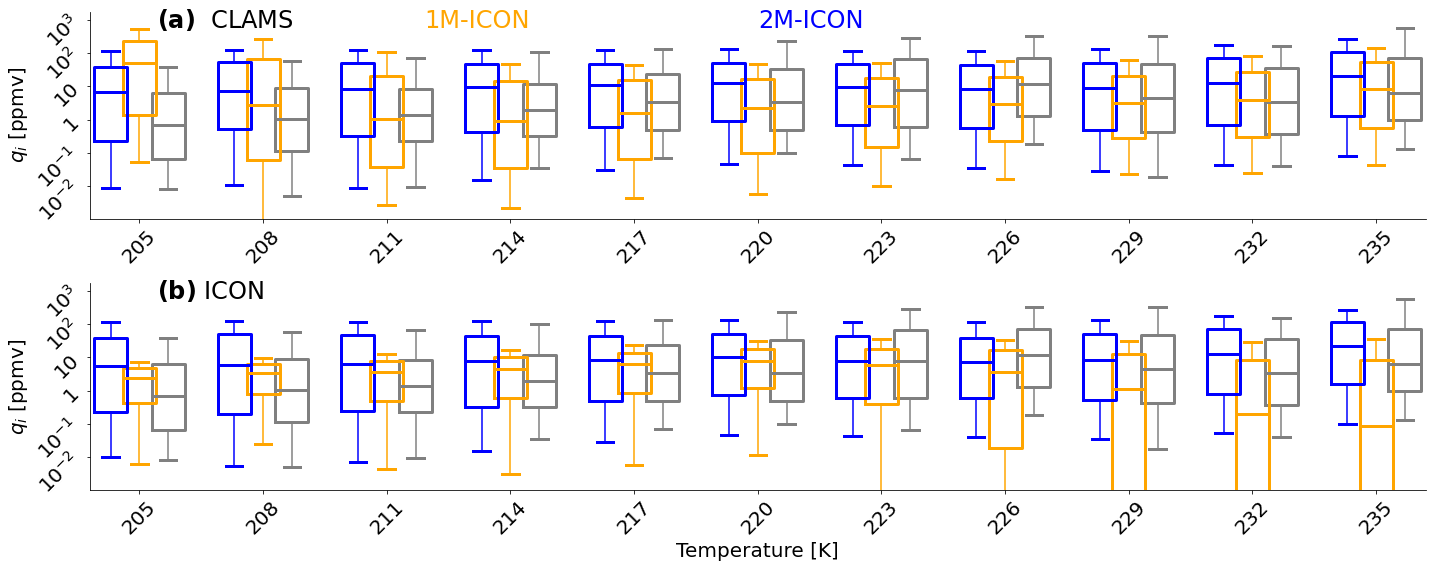

In [19]:
fs = 20
ni = 5  # Which index (temperature) should we start constructing the box plots from?
it = 3  # By how much should we iterate in constructing the box plots?

# in-situ measurement boxplots
bp = dict(linewidth=3,color='gray') # box properties
mp = dict(linewidth=3,color='gray') # median properties
wp = dict(linewidth=1.5,color='gray') # whisker properties
fp = dict(linewidth=3,color='gray') # flier properties
cp = dict(linewidth=3,color='gray') # cap properties
# CLAMS-1M boxplots
bp2 = dict(linewidth=3,color='orange') # box properties
mp2 = dict(linewidth=3,color='orange') # median properties
wp2 = dict(linewidth=1.5,color='orange') # whisker properties
fp2 = dict(linewidth=3,color='orange') # flier properties
cp2 = dict(linewidth=3,color='orange') # cap properties
# CLAMS-2M boxplots
bp3 = dict(linewidth=3,color='blue') # box properties
mp3 = dict(linewidth=3,color='blue') # median properties
wp3 = dict(linewidth=1.5,color='blue') # whisker properties
fp3 = dict(linewidth=3,color='blue') # flier properties
cp3 = dict(linewidth=3,color='blue') # cap properties

fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(20,8))
customized_box_plot(IWC_percentiles[:,ni+20:-9:it].T, pos=[t+0.7 for t in Tp[ni+20:-9:it]], axes=ax[0], n_box=len(Tp[ni+20:-9:it]), 
                    widths=0.8, whiskerprops=wp, capprops=cp, boxprops=bp, medianprops=mp, flierprops=fp);
h = np.vstack((qi_traj_stats[:,:,0],[None]*len(Tp)))
customized_box_plot(h[:,ni+20:-9:it].T, pos=[t for t in Tp[ni+20:-9:it]], axes=ax[0], n_box=len(Tp[ni+20:-9:it]), 
                    widths=0.8, whiskerprops=wp2, capprops=cp2, boxprops=bp2, medianprops=mp2, flierprops=fp2);
h = np.vstack((qi_traj_stats[:,:,2],[None]*len(Tp)))
customized_box_plot(h[:,ni+20:-9:it].T, pos=[t-0.7 for t in Tp[ni+20:-9:it]], axes=ax[0], n_box=len(Tp[ni+20:-9:it]), 
                    widths=0.8, whiskerprops=wp3, capprops=cp3, boxprops=bp3, medianprops=mp3, flierprops=fp3);

ax[0].set_xticks(Tp[ni+20:-9:it])
ax[0].set_xticklabels([str(int(t)) for t in Tp[ni+20:-9:it]])
ax[0].set_ylim(-3,3.25)
ax[0].set_yticks([-2,-1,0,1,2,3])
ax[0].set_yticklabels(['10$^{-2}$','10$^{-1}$','1','10',r'10$^{2}$',r'10$^{3}$'])
ax[0].set_ylabel(r'$q_i$ [ppmv]',fontsize=fs)
ax[0].text(0.05,0.92,r'$\bf{(a)}$  CLAMS',fontsize=fs+4,transform=ax[0].transAxes)
ax[0].text(0.25,0.92,'1M-ICON',color='orange',fontsize=fs+4,transform=ax[0].transAxes)
ax[0].text(0.5,0.92,'2M-ICON',color='blue',fontsize=fs+4,transform=ax[0].transAxes)

ax[0].tick_params('both',labelsize=fs,rotation=45)
ax[0].spines['right'].set_color(None)
ax[0].spines['top'].set_color(None)

customized_box_plot(IWC_percentiles[:,ni+20:-9:it].T, pos=[t+0.7 for t in Tp[ni+20:-9:it]], axes=ax[1], n_box=len(Tp[ni+20:-9:it]), 
                    widths=0.8, whiskerprops=wp, capprops=cp, boxprops=bp, medianprops=mp, flierprops=fp);
h = np.vstack((qi_traj_stats[:,:,1],[None]*len(Tp)))
customized_box_plot(h[:,ni+20:-9:it].T, pos=[t for t in Tp[ni+20:-9:it]], axes=ax[1], n_box=len(Tp[ni+20:-9:it]), 
                    widths=0.8, whiskerprops=wp2, capprops=cp2, boxprops=bp2, medianprops=mp2, flierprops=fp2);
h = np.vstack((qi_traj_stats[:,:,3],[None]*len(Tp)))
customized_box_plot(h[:,ni+20:-9:it].T, pos=[t-0.7 for t in Tp[ni+20:-9:it]], axes=ax[1], n_box=len(Tp[ni+20:-9:it]), 
                    widths=0.8, whiskerprops=wp3, capprops=cp3, boxprops=bp3, medianprops=mp3, flierprops=fp3);

ax[1].set_xlabel('Temperature [K]',fontsize=fs)
ax[1].set_xticks(Tp[ni+20:-9:it])
ax[1].set_xticklabels([str(int(t)) for t in Tp[ni+20:-9:it]])
ax[1].set_ylim(-3,3.25)
ax[1].set_yticks([-2,-1,0,1,2,3])
ax[1].set_yticklabels(['10$^{-2}$','10$^{-1}$','1','10',r'10$^{2}$',r'10$^{3}$'])
ax[1].set_ylabel(r'$q_i$ [ppmv]',fontsize=fs)
ax[1].text(0.05,0.92,r'$\bf{(b)}$ ICON',fontsize=fs+4,transform=ax[1].transAxes)

ax[1].tick_params('both',labelsize=fs,rotation=45)
ax[1].spines['right'].set_color(None)
ax[1].spines['top'].set_color(None)

plt.tight_layout()
#fig.savefig('output/qi-boxplots.pdf',bbox_inches='tight')
plt.show()

# 5. Comparing sample sizes in CLaMS and ICON

In [35]:
icon_dir = '/work/bb1018/b380873/traj_output/traj_ICON_0V2M0A0R/'
clams_dir = '/work/bb1018/b380873/traj_output/traj_CLAMS-Tf_0V2M0A0R/'
for i in np.arange(1,7):
    print(i)
    clams_fi = xr.open_dataset( clams_dir + 'cirrus_tst00000450_p00' + str(i) + '_trim_extract_clams.nc' )
    icon_fi = xr.open_dataset( icon_dir + 'traj_tst00000450_p00' + str(i) + '_trim_extract.nc' )
    
    clams_qi = (clams_fi['IWC_pre'] + clams_fi['IWC_hom'] + clams_fi['IWC_het']).values.flatten()
    icon_qi = icon_fi['qi'].values.flatten()
    
    # Sanity check
    #print(clams_qi.shape)
    #print(icon_qi.shape)
    
    i = np.argwhere((clams_qi > 0))
    print(clams_qi[i[:,0]].shape)
    j = np.argwhere((icon_qi > 0))
    print(icon_qi[j[:,0]].shape)    
    sample_diff = icon_qi[j[:,0]].shape[0] - clams_qi[i[:,0]].shape[0]
    diff_perc = sample_diff/clams_qi.shape[0]*100.
    print('ICON has ' + str(sample_diff) + ' more non-zero qi values than CLaMS.')
    print('ICON has ' + str(diff_perc) + '% more non-zero qi values than CLaMS.')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

1
(378041,)
(1866843,)
ICON has 1488802 more non-zero qi values than CLaMS.
ICON has 79.7496737809908% more non-zero qi values than CLaMS.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2
(395362,)
(2815568,)
ICON has 2420206 more non-zero qi values than CLaMS.
ICON has 85.95800207986453% more non-zero qi values than CLaMS.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
3
(640574,)
(4437578,)
ICON has 3797004 more non-zero qi values than CLaMS.
ICON has 85.56474474826369% more non-zero qi values than CLaMS.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
4
(767592,)
(5210327,)
ICON has 4442735 more non-zero qi values than CLaMS.
ICON has 85.26780736195072% more non-zero qi values than CLaMS.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
5
(658295,)
(5424555,)
ICON has 4766260 more non-zero qi values than CLaMS.
ICON has 87.864469720027% more non-zero qi values than CLaMS.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
6
(657755,)
(5217979,)
ICON has 4560224 more non-zero qi values than CLaMS.
ICON has 87.39439883081236% more non-zero 

[1.11574964e-03            nan 8.17757158e-04 ... 4.04891493e+04
            nan 1.69918392e+03]
[9.99372026e-04 2.08917044e+01 6.86807057e-04 ... 6.13844604e+04
 1.11816256e+02 6.57537479e-03]


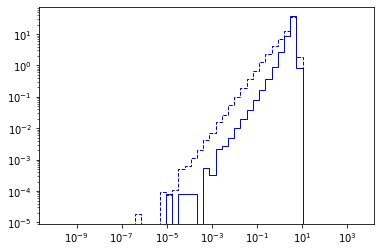

In [57]:
i = 5
m = 50
iwc_min = -10
iwc_max = 3.5

fig = plt.figure()
clams_fi = xr.open_dataset( clams_dir + 'cirrus_tst00000450_p00' + str(i) + '_trim_extract_clams.nc' )
icon_fi = xr.open_dataset( icon_dir + 'traj_tst00000450_p00' + str(i) + '_trim_extract.nc' )

# Factor of 1000 to convert from kg kg-1 to g kg-1; Factor of 10**6 to convert from g kg-1 to ppmv
clams_qi = (clams_fi['IWC_pre'] + clams_fi['IWC_hom'] + clams_fi['IWC_het']).values.flatten()*10**9
icon_qi = icon_fi['qi'].values.flatten()*10**9

i = np.argwhere((clams_qi != 0))
j = np.argwhere((icon_qi != 0))

wgts = np.ones_like(clams_qi[i[:,0]]) / float(len(clams_qi[i[:,0]]))*100
plt.hist( np.log10(clams_qi[i[:,0]]), weights=wgts, histtype='step', color='blue', linestyle='-' , bins=np.logspace(iwc_min,iwc_max,m) )
wgts = np.ones_like(icon_qi[j[:,0]]) / float(len(icon_qi[j[:,0]]))*100
plt.hist( np.log10(icon_qi[j[:,0]]), weights=wgts, histtype='step', color='blue', linestyle='--', bins=np.logspace(iwc_min,iwc_max,m) )
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

print(clams_qi[i[:,0]])
print(icon_qi[j[:,0]])

plt.show()